In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

## PARA NÃO TRUNCAR  AS LINHAS NÃO APARECER EX: DATA SCIE...
pd.set_option('display.max_colwidth', 200)

In [2]:
assistido  = pd.read_csv('ViewingActivity.csv' , delimiter=',')
            

In [3]:
assistido.head(5)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Janaína,2021-01-06 03:00:41,00:00:01,NaN,A Rainha do Sul: Temporada 4: Hospitalidade sulista (Episódio 3),NaN,Philips MT5800 with no FRC Smart TV,00:00:01,00:00:01,BR (Brazil)
1,Janaína,2021-01-06 02:19:35,00:41:00,Autoplayed: user action: Unspecified;,A Rainha do Sul: Temporada 4: Um assunto de família (Episódio 2),NaN,Philips MT5800 with no FRC Smart TV,00:41:00,00:41:00,BR (Brazil)
2,Janaína,2021-01-06 01:40:48,00:31:46,NaN,A Rainha do Sul: Temporada 4: Bem-vindos a Nova Orleans (Episódio 1),NaN,Philips MT5800 with no FRC Smart TV,00:42:44,00:42:44,BR (Brazil)
3,Janaína,2021-01-06 00:24:48,00:12:13,Autoplayed: user action: Unspecified;,A Rainha do Sul: Temporada 4: Bem-vindos a Nova Orleans (Episódio 1),NaN,Philips MT5800 with no FRC Smart TV,00:11:37,Not latest view,BR (Brazil)
4,Janaína,2021-01-05 21:32:48,00:47:49,NaN,"Peaky Blinders: Sangue, Apostas e Navalhas: Temporada 3: Episódio 6 (Episódio 6)",NaN,DefaultWidevineAndroidPhone,00:08:58,00:08:58,BR (Brazil)


In [4]:
# VERIFICANDO DADOS NULOS POR COLUNA

assistido.isnull().sum()

Profile Name                  0
Start Time                    0
Duration                      0
Attributes                 3209
Title                         0
Supplemental Video Type    7828
Device Type                   0
Bookmark                      0
Latest Bookmark               0
Country                       0
dtype: int64

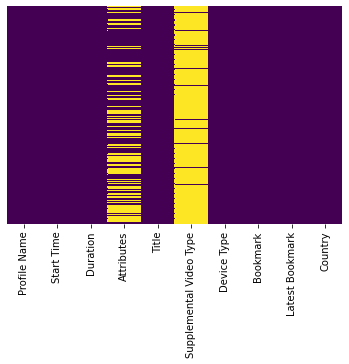

In [5]:
# VERIFICANDO DADOS NULOS PLOTADO

sns.heatmap(assistido.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#EXCLUINDO COLUNA >>> 'Supplemental Video Type'

assistido = assistido.drop('Supplemental Video Type', axis=1)
assistido.rename(columns={'Device Type':'Aparelho'}, inplace=True)  ## alterando nome da coluna Device type

In [7]:
assistido

,Profile Name,Start Time,Duration,Attributes,Title,Aparelho,Bookmark,Latest Bookmark,Country
0,Janaína,2021-01-06 03:00:41,00:00:01,NaN,A Rainha do Sul: Temporada 4: Hospitalidade sulista (Episódio 3),Philips MT5800 with no FRC Smart TV,00:00:01,00:00:01,BR (Brazil)
1,Janaína,2021-01-06 02:19:35,00:41:00,Autoplayed: user action: Unspecified;,A Rainha do Sul: Temporada 4: Um assunto de família (Episódio 2),Philips MT5800 with no FRC Smart TV,00:41:00,00:41:00,BR (Brazil)
2,Janaína,2021-01-06 01:40:48,00:31:46,NaN,A Rainha do Sul: Temporada 4: Bem-vindos a Nova Orleans (Episódio 1),Philips MT5800 with no FRC Smart TV,00:42:44,00:42:44,BR (Brazil)
3,Janaína,2021-01-06 00:24:48,00:12:13,Autoplayed: user action: Unspecified;,A Rainha do Sul: Temporada 4: Bem-vindos a Nova Orleans (Episódio 1),Philips MT5800 with no FRC Smart TV,00:11:37,Not latest view,BR (Brazil)
4,Janaína,2021-01-05 21:32:48,00:47:49,NaN,"Peaky Blinders: Sangue, Apostas e Navalhas: Temporada 3: Episódio 6 (Episódio 6)",DefaultWidevineAndroidPhone,00:08:58,00:08:58,BR (Brazil)
...,...,...,...,...,...,...,...,...,...
8214,Pietro,2017-12-24 19:26:53,00:23:14,Autoplayed: user action: Unspecified;,Bob Esponja: Temporada 7: Visão de Tentáculos / Adoro Dançar (Episódio 1),Philips MT5800 with no FRC Smart TV,00:23:14,00:23:14,BR (Brazil)
8215,Pietro,2017-12-24 18:06:57,00:00:02,NaN,Voltron - O Defensor Lendário: Temporada 1: A Origem de Voltron (Episódio 1),Philips MT5800 with no FRC Smart TV,00:00:02,Not latest view,BR (Brazil)
8216,Pietro,2017-12-24 17:45:02,00:21:51,Autoplayed: user action: None;,Transformers: Rescue Bots: Temporada 1: Sob pressão (Episódio 2),Philips MT5800 with no FRC Smart TV,00:21:51,Not latest view,BR (Brazil)
8217,Pietro,2017-12-24 17:23:02,00:21:55,Autoplayed: user action: Unspecified;,Transformers: Rescue Bots: Temporada 1: Família de heróis (Episódio 1),Philips MT5800 with no FRC Smart TV,00:21:55,Not latest view,BR (Brazil)


In [8]:
#Alterando tipo de dados para data da coluna >>  start time e Bookmark

assistido['Start Time'] = pd.to_datetime(assistido['Start Time'])
assistido['Bookmark'] = pd.to_datetime(assistido['Bookmark'])


In [9]:
## separando coluna title pegando apenas os titulos dos filmes ou séries usando LIST COMPREHENSION       
       
title = [re.split(r':+',t)[0:2] if re.findall(r':',t, flags=re.I)  else t for t in assistido['Title']]  ## separando por :



titulo= []
for t in title:
    if len(t) > 2:           # .............verificando tamanho das colunas >2
        titulo.append(t.strip())
    else:
        if len(t) == 2:      # .............verificando tamanho das colunas igual a 2
            if re.findall(r'^[tT]railer\w*|[tT]emporada\w*|[pP]arte\w*',t[0]): # ..........verificando se titulo começa com trailer,temporada,parte
                titulo.append(t[1].strip())
            else:
                titulo.append(t[0].strip())
                
titulo = [re.sub(r'\([tT]railer\)|#|\(|\)*','',x).strip().capitalize() if re.findall(r'\([tT]railer*|#*',x) else x for x in titulo]  # ...........substituindo caracters  por ''

sorted(set(titulo))




['13 reasons why',
 '1303 - apartamento do mal',
 '1922',
 '22 de julho',
 '3%',
 '365 days_hook_primary_16x9',
 '365 dni',
 '4',
 '6 balões',
 '72 animais perigosos',
 'A anatomia de grey',
 'A barraca do beijo',
 'A bruxa',
 'A caminho da lua',
 'A casa do mickey mouse',
 'A caverna',
 'A fantástica fábrica de chocolate',
 'A gente se vê  ontem',
 'A glitch is a glitch',
 'A grande luta',
 'A guarda do leão',
 'A maldição da residência hill',
 'A mente do assassino',
 'A onda',
 'A ordem',
 'A rainha do sul',
 'A saga do grande torneio raitai trailer 2',
 'A terra à noite',
 'A visita',
 'A última coisa que ele queria',
 'Abzurdah',
 'Aconteceu no natal do mickey',
 'After life - vocês vão ter de me engolir',
 'Agentes s.h.i.e.l.d. da marvel',
 'Alerta lobo',
 'Alex strangelove',
 'All your fault',
 'Altered carbon',
 'Alvin e os esquilos',
 'American pie 2 - a segunda vez é ainda melhor',
 'Amigos da clínica',
 'Amityville',
 'Amizade desfeita',
 'Amizade dolorida',
 'Andar montar r

In [10]:
## ADICIONANDO COLUNA COM O TIPO DO APARELHO SE É CELULAR,TV OU TABLET

assistido['Device Type'] = assistido['Aparelho'].apply(lambda x: 'Celular' if re.findall(r'Phone',x) else \
                                                    ('Tablet' if re.findall(r'Tablet',x) else 'TV'))

In [11]:
# CRIANDO NOVA COLUNA COM APENAS O TITULO NO DF
assistido['Title_2'] = titulo

In [12]:
# ALTERANDO ORDEM DAS COLUNAS

assistido =  assistido[['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',  'Title_2','Aparelho','Device Type', 'Bookmark', 'Latest Bookmark', 'Country']]

### Exemplo de verificando se a string ':' NÃO existe numa determinada coluna e mostrando  os que não tem

In [13]:
#assistido[~assistido['Title'].str.contains    ---------------- >> mostrando os que não tem utilizando ~
#assistido.query('Title.str.contains(":")', engine='python')  --------->> mostrando os que contém ":" usando query

sem2pontos = assistido[assistido['Title'].str.contains(":") == False] ## ------- >> mostrando os que não tem ":" no titulo
sem2pontos.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Title_2,Aparelho,Device Type,Bookmark,Latest Bookmark,Country
24,Pietro,2020-12-28 17:50:38,01:10:02,Autoplayed: user action: Unspecified;,Pequenos Grandes Heróis,Pequenos grandes heróis,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 01:31:20,01:31:20,BR (Brazil)
69,Pietro,2020-12-09 19:30:35,00:58:22,Autoplayed: user action: Unspecified;,Hotel Transilvânia 2,Hotel transilvânia 2,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 00:58:17,00:58:17,BR (Brazil)
106,Janaína,2020-12-05 01:55:03,01:40:02,Autoplayed: user action: Unspecified;,Crônicas de Natal,Crônicas de natal,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 01:38:26,01:38:26,BR (Brazil)
114,Janaína,2020-12-03 00:49:02,01:39:59,Autoplayed: user action: Unspecified;,Dunkirk,Dunkirk,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 01:39:39,01:39:39,BR (Brazil)
168,Janaína,2020-11-05 00:29:02,01:34:45,Autoplayed: user action: Unspecified;,Fratura,Fratura,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 01:35:53,01:35:53,BR (Brazil)
170,Janaína,2020-11-02 00:17:47,00:00:05,Autoplayed: user action: None;,Bronx (Trailer),Bronx,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 00:00:06,00:00:06,BR (Brazil)
171,Janaína,2020-10-31 00:17:15,02:26:15,Autoplayed: user action: Unspecified;,O Regresso,O regresso,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 02:26:45,02:26:45,BR (Brazil)
172,Janaína,2020-10-31 00:13:54,00:00:31,Autoplayed: user action: Unspecified;,O Regresso,O regresso,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 00:00:31,Not latest view,BR (Brazil)
179,Janaína,2020-10-28 20:07:49,00:00:07,Autoplayed: user action: None;,À prova de fogo,À prova de fogo,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 00:00:07,00:00:07,BR (Brazil)
180,Janaína,2020-10-28 20:06:20,00:00:01,Autoplayed: user action: Unspecified;,À prova de fogo,À prova de fogo,Philips MT5800 with no FRC Smart TV,TV,2021-01-14 00:00:01,Not latest view,BR (Brazil)


In [14]:
## VERIFICANDO SE É SÉRIE OU FILME


assistido['Tipo'] =  assistido['Title'].apply(lambda x: 'Série' if re.findall(r'Temporada|Episódio',x) else 'Filme')



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
## VERIFICANDO SE APENAS VIU O  TRAILER OU ASSISTIU

assistido['Ação'] =  assistido['Title'].apply(lambda x: 'Trailer' if 'Trailer' in x else 'Assistiu')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#pd.crosstab(assistido.Tipo, assistido.Ação, margins=True, margins_name="Total")
assistido.groupby('Device Type').count()


,Profile Name,Start Time,Duration,Attributes,Title,Title_2,Aparelho,Bookmark,Latest Bookmark,Country,Tipo,Ação
Device Type,,,,,,,,,,,,
Celular,615,615,615,2,615,615,615,615,615,615,615,615
TV,7509,7509,7509,5008,7509,7509,7509,7509,7509,7509,7509,7509
Tablet,95,95,95,0,95,95,95,95,95,95,95,95


In [18]:
# QUANTIDADE DE FILMES ÚNICOS


filmes=assistido.loc[assistido['Tipo'] == 'Filme']
set(filmes['Title_2'])

{'1303 - apartamento do mal',
 '1922',
 '22 de julho',
 '365 days_hook_primary_16x9',
 '365 dni',
 '4',
 '6 balões',
 '72 animais perigosos',
 'A barraca do beijo',
 'A bruxa',
 'A caminho da lua',
 'A caverna',
 'A fantástica fábrica de chocolate',
 'A gente se vê  ontem',
 'A glitch is a glitch',
 'A grande luta',
 'A mente do assassino',
 'A onda',
 'A saga do grande torneio raitai trailer 2',
 'A visita',
 'A última coisa que ele queria',
 'Abzurdah',
 'Aconteceu no natal do mickey',
 'Alerta lobo',
 'Alex strangelove',
 'All your fault',
 'Alvin e os esquilos',
 'American pie 2 - a segunda vez é ainda melhor',
 'Amigos da clínica',
 'Amityville',
 'Amizade desfeita',
 'Andar montar rodeio - a virada de amberley',
 'Angry birds',
 'Aniquilação',
 'Another five more short graybles',
 'Apenas duas noites',
 'Arrow',
 'As novas aventuras do macaco',
 'As tartarugas ninja',
 'As telefonistas',
 'As épicas aventuras do capitão cueca',
 'Asfalto de sangue',
 'Atchim e espirro - a turma d

In [19]:


netflix_final = assistido[['Profile Name', 'Start Time', 'Duration', 'Attributes','Title_2', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country',
       'Tipo', 'Ação']]

In [20]:
netflix_final.to_csv('base_final_netflix.csv' , sep=',', header=True)